# 다항 회귀분석 
피쳐들과 레이블이 2차함수 이상의 관계를 가지는 것으로 곡선이나 좀 더 복잡한 모양을 표현하는 것이 가능

# 피쳐들의 차수를 높이는 형태

다항 회귀 역시 선형회귀로 간주되는데 선형회귀의 정의가 단순히 직선이나 곡선과 같은 모양에 있는 것이 아니라 가중치와 피쳐들의 선형 결합이 있기 떄문

다항회귀는 별도의 알고리즘이 있는 것이 아니라 피쳐들을 제곱, 서로곱한 값 등 더 복잡한 값으로 만들어 선형회귀에 넣어서 학습시킴

사이킷 런에서는 폴리노미알피쳐 클래스로 원본 단항 피쳐들을 다항 피쳐들로 변환한 데이터세트에 선형회귀 객체를 적용한느 것으로 다항 회귀가능

## #01. 작업준비
### 패키지 준비


In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb

import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
import helper


In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 자동차의 속도에 따른 제동거리 예측


### 데이터 가져오기

In [3]:
origin= pd.read_excel('https://data.hossam.kr/E04/cars.xlsx')

origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16



### 훈련데이터와 검증데이터 분할

- train 데이터 / 훈련데이터 : 모델을 생성하는데 사용되는 데이터
- test 데이터 / 검증데이터 : 모델이 얼마나 잘 만들어 졌는지 확인하기 위한 데이터

#### 데이터 프레임을 통쨰로 넣는 경우
데이터 프레임을 독립변수와 종속변수가 모두 포함되어 있는 형태

같은 유형으로 일정 비율로 분할된 두개의 데이터 프레임이 반환된다. 




In [4]:
poly =PolynomialFeatures(degree=2,include_bias=True)
fit = poly.fit_transform(origin[['speed']])


#### 생성된 피처의 이름확인

In [5]:
poly.get_feature_names_out()

array(['1', 'speed', 'speed^2'], dtype=object)

#### 0 차항 (1) 을 포함하지 않는 2차식으로 변형

In [6]:
poly =PolynomialFeatures(degree=2,include_bias=False)
fit = poly.fit_transform(origin[['speed']])
fit

array([[  4.,  16.],
       [  4.,  16.],
       [  7.,  49.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 10., 100.],
       [ 10., 100.],
       [ 11., 121.],
       [ 11., 121.],
       [ 12., 144.],
       [ 12., 144.],
       [ 12., 144.],
       [ 12., 144.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 14., 196.],
       [ 14., 196.],
       [ 14., 196.],
       [ 14., 196.],
       [ 15., 225.],
       [ 15., 225.],
       [ 15., 225.],
       [ 16., 256.],
       [ 16., 256.],
       [ 17., 289.],
       [ 17., 289.],
       [ 17., 289.],
       [ 18., 324.],
       [ 18., 324.],
       [ 18., 324.],
       [ 18., 324.],
       [ 19., 361.],
       [ 19., 361.],
       [ 19., 361.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.],
       [ 24., 576.],
       [ 24.,

In [7]:
poly.get_feature_names_out()

array(['speed', 'speed^2'], dtype=object)

#### 데이터 프레임으로 재구성


In [8]:
x = pd.DataFrame(fit,columns=poly.get_feature_names_out())
x.head()

,speed,speed^2
0,4.0,16.0
1,4.0,16.0
2,7.0,49.0
3,7.0,49.0
4,8.0,64.0


### 종속변수만 추출한 데이터 프레임

In [9]:
y = origin[['dist']]
y.head()

,dist
0,2
1,10
2,4
3,22
4,16


#### 테스트 데이터와 검증 데이터로 분리

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=3,random_state=20)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(35, 2)
(35, 1)
(15, 2)
(15, 1)


### 회귀분석 수행
표본수 적어서 과적합 무시하고 ㄱ

In [11]:
model = LinearRegression()
fit = model.fit(x_train,y_train)

## 직선의 기울기 
coef = fit.coef_



## 절편 
intercept = fit.intercept_

print ('기울기: ', coef)

print('절편 : ',intercept )


rscore = fit.score(x_train,y_train)
rscore_test = fit.score(x_test,y_test)
print('훈련 데이터 설명력 : ',rscore)
print('검증 데이터 설명력 : ',rscore_test)

기울기:  [[0.96405552 0.10144317]]
절편 :  [1.50537389]
훈련 데이터 설명력 :  0.6079312442179488
검증 데이터 설명력 :  0.8009124474679928


### 회귀식 추정


In [12]:
feature_name = x.columns
expr = []
for i, v in enumerate(feature_name):
    expr.append("%f * %s" % (fit.coef_[0][1],v))

expr = " + ".join(expr)
expr = 'y = ' + expr + ' + %f' %fit.intercept_[0]
expr



'y = 0.101443 * speed + 0.101443 * speed^2 + 1.505374'

### 예측값 생성
훈련데이터에 대한 예측값

In [13]:
y_pred_train = fit.predict(x_train)
y_pred_train = y_pred_train.reshape(-1)

In [14]:
y_pred_test = fit.predict(x_test)
y_pred_test = y_pred_test.reshape(-1)

### 학습 결과 시각화

In [15]:
x_train

,speed,speed^2
33,18.0,324.0
36,19.0,361.0
42,20.0,400.0
10,11.0,121.0
3,7.0,49.0
41,20.0,400.0
13,12.0,144.0
46,24.0,576.0
2,7.0,49.0
38,20.0,400.0


In [16]:
import numpy as np

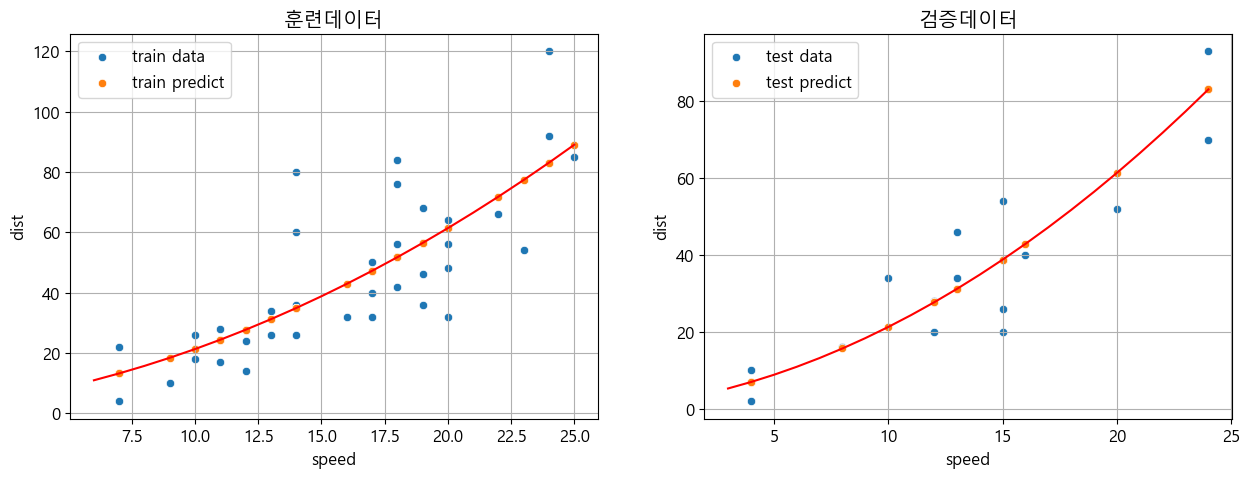

In [17]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

# 학습에 사용한 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_train['speed'],y=y_train['dist'],label = 'train data',ax=ax1)
sb.scatterplot(x=x_train['speed'],y=y_pred_train,label = 'train predict',ax=ax1)

## 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성

xmin, xmax = ax1.get_xlim()
xrange = np.arange(xmin.round(),xmax.round(),1)

## y값에 대한 추정치 계산

y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

## 추세선
sb.lineplot(x=xrange,y=y_pred,color='red',ax=ax1)
ax1.set_title('훈련데이터')
ax1.legend()
ax1.grid()

# 검증용 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_test['speed'],y=y_test['dist'],label='test data',ax=ax2)
sb.scatterplot(x=x_test['speed'],y=y_pred_test,label = 'test predict',ax=ax2)
## 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성

xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(),xmax.round(),1)

## y값에 대한 추정치 계싼 
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

## 추세선 
sb.lineplot(x=xrange,y=y_pred,color='red',ax=ax2)


ax2.set_title('검증데이터')
ax2.legend()
ax2.grid()

plt.show()
plt.close()

## #03. 농어 길이 예측



In [18]:
origin= pd.read_excel('https://data.hossam.kr/F02/fish2.xlsx')

origin.head()

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


### 다항식으로 변환하기

In [19]:
poly = PolynomialFeatures(degree=2,include_bias=False)
fit = poly.fit_transform(origin[['길이','높이','두께']])
x = pd.DataFrame(fit,columns=poly.get_feature_names_out())
x.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,8.4,2.11,1.41,70.56,17.724,11.844,4.4521,2.9751,1.9881
1,13.7,3.53,2.00,187.69,48.361,27.400,12.4609,7.0600,4.0000
2,15.0,3.82,2.43,225.00,57.300,36.450,14.5924,9.2826,5.9049
3,16.2,4.59,2.63,262.44,74.358,42.606,21.0681,12.0717,6.9169
4,17.4,4.59,2.94,302.76,79.866,51.156,21.0681,13.4946,8.6436


### 모듈 기능을 활용한 다항식 변환

In [20]:
x= helper.convertPoly(origin[['길이','높이','두께']])
x.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,8.4,2.11,1.41,70.56,17.724,11.844,4.4521,2.9751,1.9881
1,13.7,3.53,2.00,187.69,48.361,27.400,12.4609,7.0600,4.0000
2,15.0,3.82,2.43,225.00,57.300,36.450,14.5924,9.2826,5.9049
3,16.2,4.59,2.63,262.44,74.358,42.606,21.0681,12.0717,6.9169
4,17.4,4.59,2.94,302.76,79.866,51.156,21.0681,13.4946,8.6436


### 훈련데이터와 검증데이터로 분리

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,origin[['무게']],test_size=0.3,shuffle=2,random_state=23)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(39, 9)
(39, 1)
(17, 9)
(17, 1)


### 회귀분석 순행


In [22]:
model = LinearRegression()
fit = model.fit(x_train,y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))


계수:  [[  26.23503335 -125.57166799  -61.33396409   -2.16800703    5.04789757
    15.46749184   53.35969761 -179.60994797  117.87161196]]
절편:  [108.53236759]
훈련 데이터 설명력:  0.9899991553243885
검증 데이터 설명력:  0.9733293097765251


### 회귀식 추정

In [23]:
feature_name = x.columns
expr = []

for i , v in enumerate(feature_name) :
    expr.append(f'{round(fit.coef_[0][i])} * {v}')

expr = ' + '.join(expr)

expr = f"y = {expr} + {round(fit.intercept_[0],2)}"
expr

'y = 26 * 길이 + -126 * 높이 + -61 * 두께 + -2 * 길이^2 + 5 * 길이 높이 + 15 * 길이 두께 + 53 * 높이^2 + -180 * 높이 두께 + 118 * 두께^2 + 108.53'

### 예측값 생성
훈련데이터에 대한 예측값



In [24]:
y_pred_train = fit.predict(x_train)
y_pred_train = y_pred_train.reshape(-1)
y_pred_train

array([ 314.17059576,  113.23385425,  695.95614507,  240.44442715,
        215.0005195 ,  221.71078525, 1045.54467464,  147.58723436,
        264.61294462,  772.45222037,   65.60883665,  271.30706857,
         70.5295051 ,  880.92162803,   31.38389154, 1060.62360165,
        942.2572962 ,  128.48032121,  906.12460286,  674.39587545,
         34.70657832,   58.33578966,  136.39632759,  101.66287928,
         45.98442076,  883.92057214,   66.21922349,  159.57424218,
        189.35075459,  821.22255279,  163.40523222,  123.54245092,
        739.95672261,  239.54601607, 1020.70261359,   82.03595933,
        726.24068271,  604.08463623,  135.66631727])

In [25]:
#### 검증데이터에 대한 예측값
len(x_test)

17

In [26]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([ 119.18913025,  935.34257247,  119.36685226,  283.65533811,
        292.75428948,  206.04050907,  957.10181393,  218.10167029,
       1169.51713225,  188.15926535,  147.75806265,  664.12455893,
        120.79042796,  110.73693441,   80.69519758,  517.51663712,
         32.54157631])

### 학습결과 시각화

In [27]:
origin.head()

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


In [28]:
len(y_test)

17

In [29]:
len(y_pred_test)

15

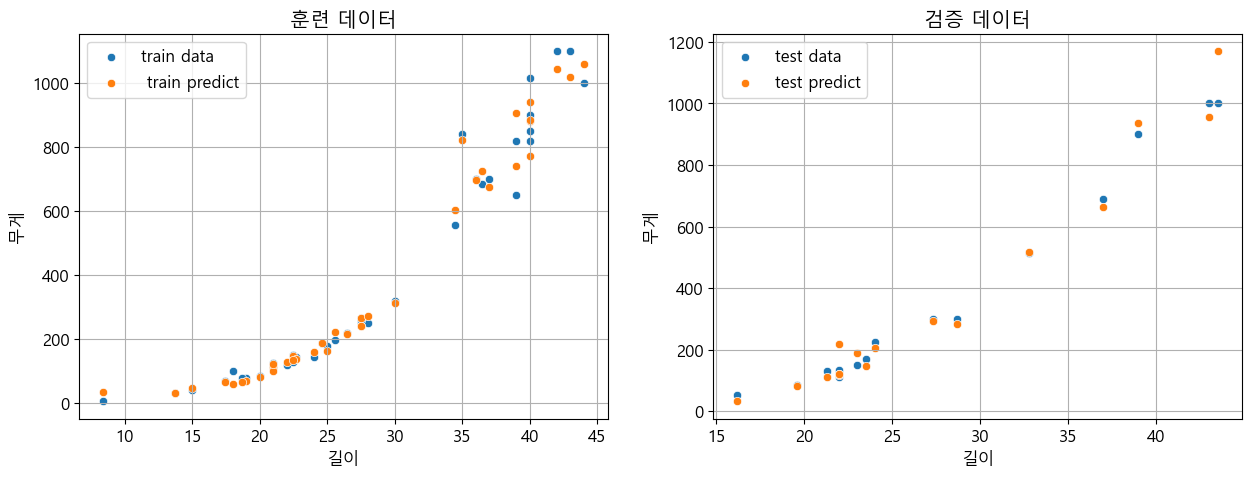

In [30]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,5))

sb.scatterplot(x=x_train['길이'],y=y_train['무게'],label = 'train data',ax=ax1)
sb.scatterplot(x=x_train['길이'],y=y_pred_train,label = ' train predict',ax=ax1)
ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()


sb.scatterplot(x=x_test['길이'],y=y_test['무게'],label = 'test data',ax=ax2)
sb.scatterplot(x=x_test['길이'],y=y_test_pred,label= 'test predict',ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

### 추세선 그리기 

seaborn의 regplot은 직선만 제공  - > 2차식을 표현하는 추세선은 직접 구현해야함

In [31]:
x=x_train['길이']

y= y_train['무게']


#### x에따라 y 값이 변하는 2차방정식 생성

In [32]:
coeff = np.polyfit(x,y,2)
coeff

array([  1.08690343, -25.7423217 , 167.91096962])

#### 평면 좌표 상에서의 가상의 x값 생성


In [33]:
vtrend = np.linspace(x.min(),x.max(),100)



In [34]:
ttrend = vtrend**2 * coeff[0] + vtrend * coeff[1] + coeff[2]
ttrend

array([  28.36737334,   25.81729931,   23.54831863,   21.56043129,
         19.85363729,   18.42793663,   17.28332932,   16.41981536,
         15.83739473,   15.53606745,   15.51583351,   15.77669292,
         16.31864567,   17.14169176,   18.2458312 ,   19.63106398,
         21.29739011,   23.24480958,   25.47332239,   27.98292854,
         30.77362804,   33.84542088,   37.19830707,   40.8322866 ,
         44.74735947,   48.94352569,   53.42078525,   58.17913815,
         63.2185844 ,   68.53912399,   74.14075693,   80.0234832 ,
         86.18730283,   92.63221579,   99.3582221 ,  106.36532175,
        113.65351475,  121.22280109,  129.07318077,  137.2046538 ,
        145.61722017,  154.31087988,  163.28563294,  172.54147934,
        182.07841908,  191.89645217,  201.9955786 ,  212.37579838,
        223.0371115 ,  233.97951796,  245.20301776,  256.70761091,
        268.49329741,  280.56007724,  292.90795042,  305.53691695,
        318.44697681,  331.63813002,  345.11037658,  358.86371

#### 확인 



<Axes: xlabel='길이', ylabel='무게'>

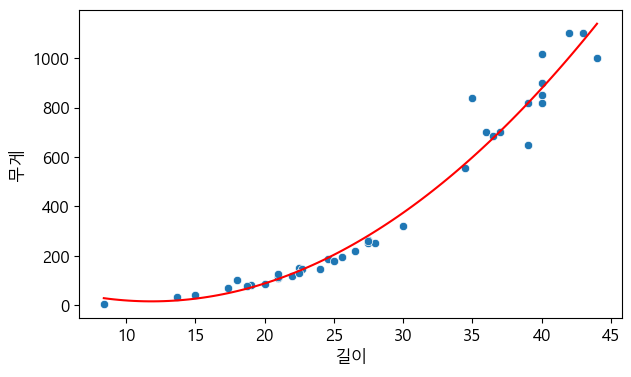

In [35]:
plt.figure(figsize=(7,4))

sb.scatterplot(x=x_train['길이'],y=y_train['무게'])
sb.lineplot(x=vtrend,y=ttrend,color='red')

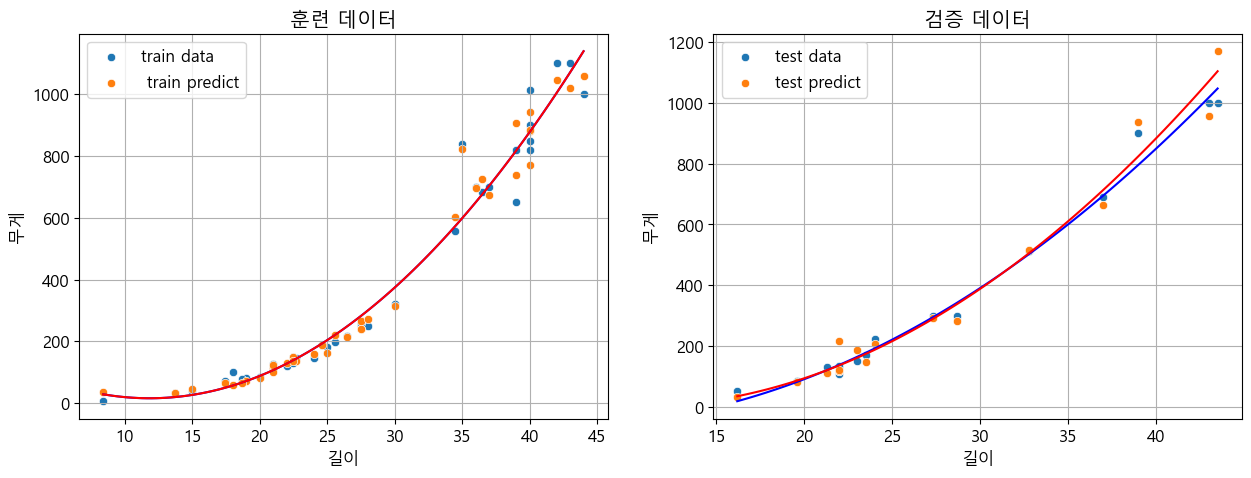

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
## 학습에 사용된 관측치 시각화

sb.scatterplot(x=x_train['길이'],y=y_train['무게'],label = 'train data',ax=ax1)
## 학습에 사용한 데이터에 추세선
x,y = helper.getTrend(x_train['길이'],y_train['무게'])
sb.lineplot(x=x,y=y,color='blue',ax=ax1)
## 학습 데이터에 따른 추정치
sb.scatterplot(x=x_train['길이'],y=y_pred_train,label = ' train predict',ax=ax1)

### 추정치에 대한 추세선
x,y= helper.getTrend(x=x_train['길이'],y=y_pred_train)
sb.lineplot(x=x,y=y,color='red',ax=ax1)
ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()

## 검증데이터 시각화
sb.scatterplot(x=x_test['길이'],y=y_test['무게'],label = 'test data',ax=ax2)
## 검증데이터 추세선
x,y = helper.getTrend(x_test['길이'],y_test['무게'])
sb.lineplot(x=x,y=y,color='blue',ax=ax2)
### 검증데이터 추정치 시각화
sb.scatterplot(x=x_test['길이'],y=y_test_pred,label= 'test predict',ax=ax2)

## 검증데이터 추정치에 대한 추세선
x,y = helper.getTrend(x_test['길이'],y_test_pred)
sb.lineplot(x=x,y=y,color='red',ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()